#### Name: Sourav Kotkar
#### Roll No: 31378

## Assignment-4 : Data Analytics II
#### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
#### The objective is to predict the value of prices of the house using the given features.

In [28]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('HousingData.csv')

In [30]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Visual Analysis

In [31]:
df.skew()

CRIM       5.212843
ZN         2.256613
INDUS      0.303722
CHAS       3.382293
NOX        0.729308
RM         0.403612
AGE       -0.582470
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.908892
MEDV       1.108098
dtype: float64

### Removing Outliers

In [32]:
MEDV_Q1 = df['CRIM'].quantile(0.25) #First quartile
MEDV_Q3 = df['CRIM'].quantile(0.75) #Third quartile
MEDV_IQR = MEDV_Q3 - MEDV_Q1 #Inter quartile range
MEDV_lower_limit = MEDV_Q1 - 1.5 * MEDV_IQR
MEDV_upper_limit = MEDV_Q3 + 1.5 * MEDV_IQR
MEDV_lower_limit, MEDV_upper_limit

(-5.13564375, 8.77780625)

In [33]:
df = df[(df['CRIM']>MEDV_lower_limit) & (df['CRIM']<MEDV_upper_limit)]

In [34]:
MEDV_Q1 = df['ZN'].quantile(0.25) #First quartile
MEDV_Q3 = df['ZN'].quantile(0.75) #Third quartile
MEDV_IQR = MEDV_Q3 - MEDV_Q1 #Inter quartile range
MEDV_lower_limit = MEDV_Q1 - 1.5 * MEDV_IQR
MEDV_upper_limit = MEDV_Q3 + 1.5 * MEDV_IQR
MEDV_lower_limit, MEDV_upper_limit

(-30.0, 50.0)

In [35]:
df = df[(df['CRIM']>MEDV_lower_limit) & (df['CRIM']<MEDV_upper_limit)]

In [36]:
MEDV_Q1 = df['B'].quantile(0.25) #First quartile
MEDV_Q3 = df['B'].quantile(0.75) #Third quartile
MEDV_IQR = MEDV_Q3 - MEDV_Q1 #Inter quartile range
MEDV_lower_limit = MEDV_Q1 - 1.5 * MEDV_IQR
MEDV_upper_limit = MEDV_Q3 + 1.5 * MEDV_IQR
MEDV_lower_limit, MEDV_upper_limit

(351.7850000000001, 422.625)

In [37]:
df = df[(df['B']>MEDV_lower_limit) & (df['B']<MEDV_upper_limit)]

In [38]:
df.skew()

CRIM       2.707550
ZN         1.915606
INDUS      0.956408
CHAS       3.252010
NOX        1.321926
RM         0.753180
AGE       -0.272040
DIS        0.829689
RAD        2.254455
TAX        1.478925
PTRATIO   -0.596105
B         -1.846815
LSTAT      1.104744
MEDV       1.363976
dtype: float64

### Removing Null Values

In [41]:
df.isnull().sum()

CRIM        0
ZN         14
INDUS      17
CHAS       12
NOX         0
RM          0
AGE        16
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      16
MEDV        0
dtype: int64

In [42]:
median_value=df['ZN'].median()
df['ZN'].fillna(value=median_value, inplace=True)

mean_value=df['INDUS'].mean()
df['INDUS'].fillna(value=mean_value, inplace=True)

median_value=df['CHAS'].median()
df['CHAS'].fillna(value=median_value, inplace=True)

mean_value=df['AGE'].mean()
df['AGE'].fillna(value=mean_value, inplace=True)

mean_value=df['LSTAT'].mean()
df['LSTAT'].fillna(value=mean_value, inplace=True)

In [43]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [44]:
df.dtypes #Print datatypes of variables

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [45]:
df.describe() #Print statistical information

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.850427,13.479947,9.143165,0.072193,0.520234,6.390642,61.887989,4.310324,6.502674,348.732620,18.200000,389.339920,10.608855,24.690374
std,1.739025,25.150784,6.242732,0.259153,0.100135,0.681945,26.938825,2.082340,6.264393,131.614345,2.132136,10.025438,5.606508,8.429599
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.202400,1.000000,187.000000,12.600000,351.850000,1.730000,8.500000
25%,0.061538,0.000000,4.490000,0.000000,0.442225,5.943750,39.250000,2.608500,4.000000,270.000000,16.900000,386.775000,6.492500,19.500000
50%,0.141905,0.000000,7.380000,0.000000,0.504000,6.260000,61.943994,3.925850,5.000000,307.000000,18.500000,393.270000,9.770000,22.600000
75%,0.532323,20.000000,11.650000,0.000000,0.573000,6.727000,87.200000,5.640050,6.000000,398.000000,20.200000,396.900000,13.570000,28.075000
max,8.716750,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [46]:
df.corr() #Compute pairwise correlation of columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.238252,0.524862,0.065777,0.631474,-0.134077,0.382920,-0.391147,0.894386,0.803274,0.255035,-0.144041,0.273449,-0.187035
ZN,-0.238252,1.000000,-0.462186,-0.038647,-0.474239,0.287798,-0.505913,0.593220,-0.216704,-0.208572,-0.374298,0.056098,-0.383336,0.324069
INDUS,0.524862,-0.462186,1.000000,0.090708,0.658973,-0.317040,0.504473,-0.601041,0.454410,0.606513,0.361204,-0.130651,0.460903,-0.343742
CHAS,0.065777,-0.038647,0.090708,1.000000,0.096035,0.101558,0.111371,-0.129163,0.083277,0.014637,-0.077632,-0.039096,0.047901,0.136174
NOX,0.631474,-0.474239,0.658973,0.096035,1.000000,-0.229831,0.668746,-0.730425,0.504166,0.567096,0.120105,-0.176026,0.495870,-0.255739
RM,-0.134077,0.287798,-0.317040,0.101558,-0.229831,1.000000,-0.164856,0.082180,-0.079340,-0.195182,-0.368560,-0.003313,-0.619619,0.794004
AGE,0.382920,-0.505913,0.504473,0.111371,0.668746,-0.164856,1.000000,-0.666107,0.273584,0.330049,0.184719,-0.068866,0.542763,-0.260932
DIS,-0.391147,0.593220,-0.601041,-0.129163,-0.730425,0.082180,-0.666107,1.000000,-0.302500,-0.344991,-0.135024,0.026666,-0.356305,0.059622
RAD,0.894386,-0.216704,0.454410,0.083277,0.504166,-0.079340,0.273584,-0.302500,1.000000,0.834908,0.307468,-0.143730,0.151726,-0.127838
TAX,0.803274,-0.208572,0.606513,0.014637,0.567096,-0.195182,0.330049,-0.344991,0.834908,1.000000,0.337187,-0.151190,0.265623,-0.274055


### Preparing Data for Training the Model

In [47]:
#X = df_without_outliers[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

In [48]:
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.980000
1,6.421,17.8,9.140000
2,7.185,17.8,4.030000
3,6.998,18.7,2.940000
4,7.147,18.7,10.608855
...,...,...,...
501,6.593,21.0,10.608855
502,6.120,21.0,9.080000
503,6.976,21.0,5.640000
504,6.794,21.0,6.480000


In [49]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 374, dtype: float64

### Training the Regression Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

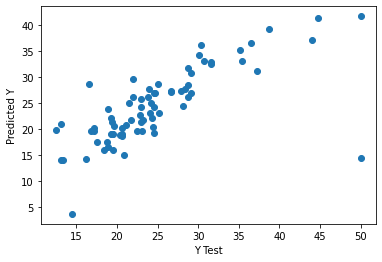

In [61]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 3.14151784098552
Mean Squared Error: 30.2042457611749
Root Mean Squared Error: 5.49583894971231


In [63]:
lm.score(X_test, y_test)

0.5084591513368211